# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [48]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [49]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#units = "Imperial"

# Build partial query URL
#query_url = f"{url}&units={units}&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | udachny
Processing Record 2 of Set 1 | paraty
Processing Record 3 of Set 1 | port saint john's
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | enewetak
Processing Record 8 of Set 1 | morropon
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | price
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | semera
Processing Record 15 of Set 1 | ketchikan
Processing Record 16 of Set 1 | kone
Processing Record 17 of Set 1 | barra de santo antonio
Processing Record 18 of Set 1 | sao jose da coroa grande
Processing Record 19 of Set 1 | bereeda
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | kiruna
Processing Record 22 of Set 1 | kirandul
City

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)           
# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,16.48,94,87,5.66,RU,1712872087
1,zemetchino,53.4973,42.6163,58.53,90,100,5.91,RU,1712872088
2,invercargill,-46.4000,168.3500,48.02,87,100,1.99,NZ,1712872089
3,bamboo flat,11.7000,92.7167,80.53,81,7,4.90,IN,1712872089
4,utrik,11.2278,169.8474,79.99,75,96,20.80,MH,1712872090


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/willy/OneDrive/Documentos/GitHub/python_api_challenge_2024/output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/willy/OneDrive/Documentos/GitHub/python_api_challenge_2024/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,16.48,94,87,5.66,RU,1712872087
1,zemetchino,53.4973,42.6163,58.53,90,100,5.91,RU,1712872088
2,invercargill,-46.4000,168.3500,48.02,87,100,1.99,NZ,1712872089
3,bamboo flat,11.7000,92.7167,80.53,81,7,4.90,IN,1712872089
4,utrik,11.2278,169.8474,79.99,75,96,20.80,MH,1712872090


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

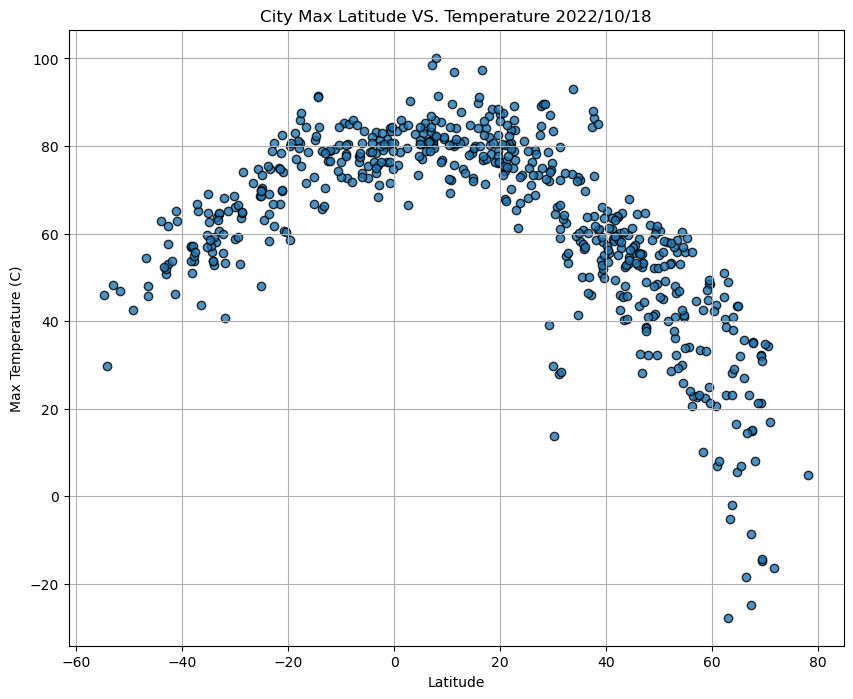

In [41]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
# YOUR CODE HERE

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude VS. Temperature 2022/10/18")
plt.grid()
# YOUR CODE HERE

# Save the figure
plt.savefig("C:/Users/willy/OneDrive/Documentos/GitHub/python_api_challenge_2024/output_data/Fig1.png", bbox_inches = "tight")

# Show plot
plt.show()

#### Latitude Vs. Humidity

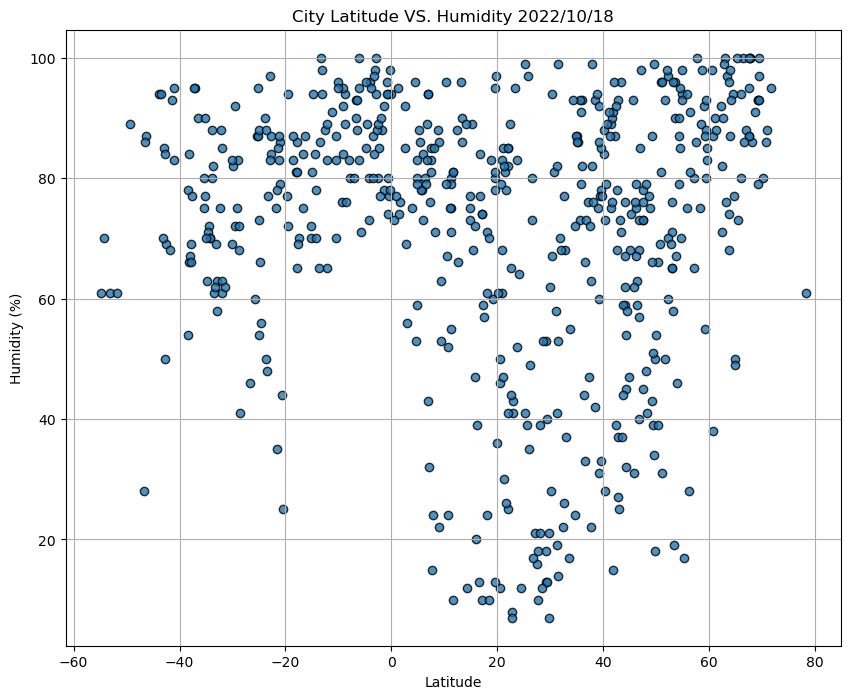

In [42]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
# YOUR CODE HERE

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude VS. Humidity 2022/10/18")
plt.grid()

# YOUR CODE HERE

# Save the figure
plt.savefig("C:/Users/willy/OneDrive/Documentos/GitHub/python_api_challenge_2024/output_data/Fig2.png", bbox_inches = "tight")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

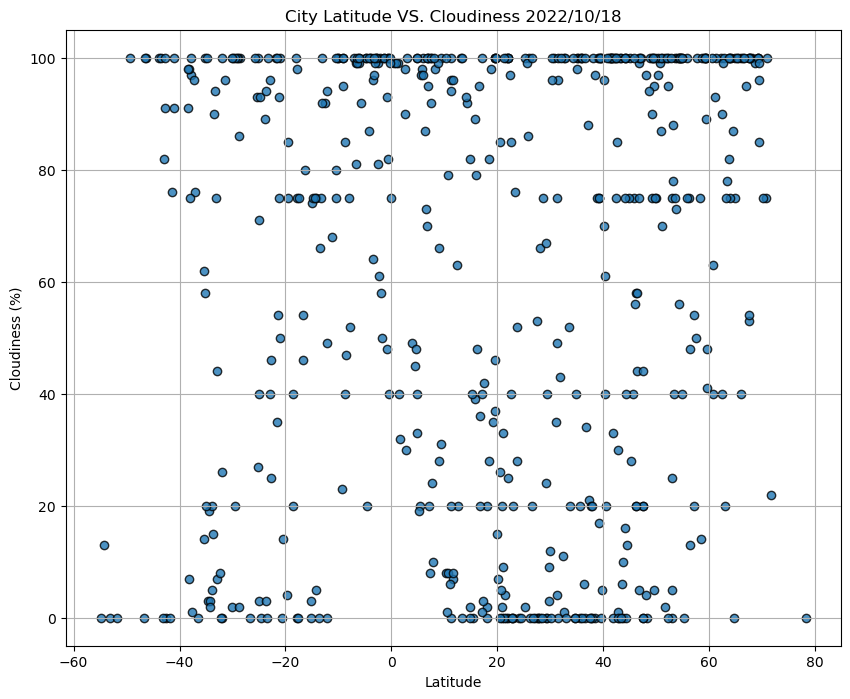

In [43]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
# YOUR CODE HERE

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude VS. Cloudiness 2022/10/18")
plt.grid()
# YOUR CODE HERE

# Save the figure
plt.savefig("C:/Users/willy/OneDrive/Documentos/GitHub/python_api_challenge_2024/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

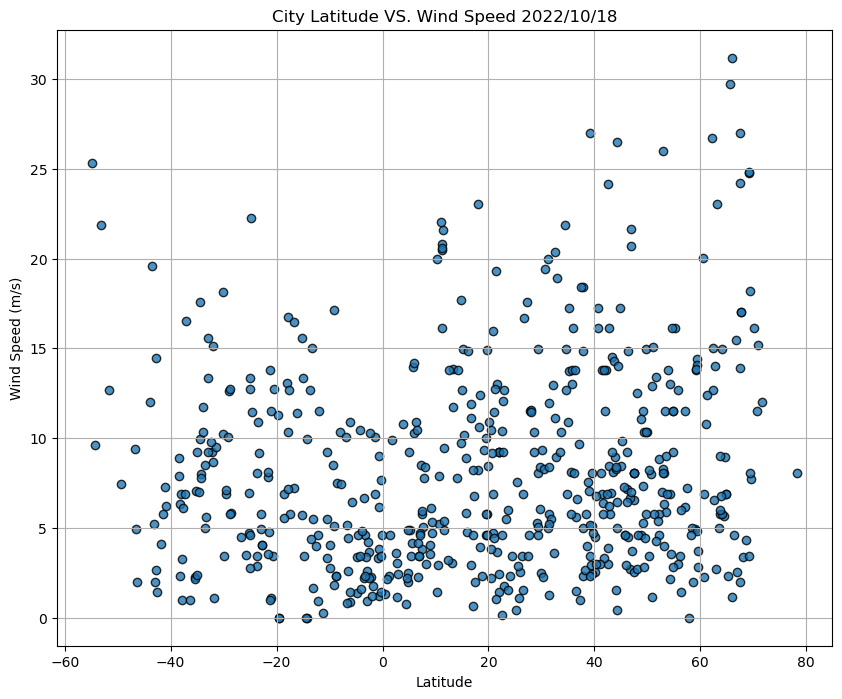

In [45]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
# YOUR CODE HERE

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude VS. Wind Speed 2022/10/18")
plt.grid()
# YOUR CODE HERE

# Save the figure
plt.savefig("C:/Users/willy/OneDrive/Documentos/GitHub/python_api_challenge_2024/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots

# YOUR CODE HERE

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data.loc[city_data['Lat'] > 0]
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

AttributeError: 'list' object has no attribute 'loc'

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


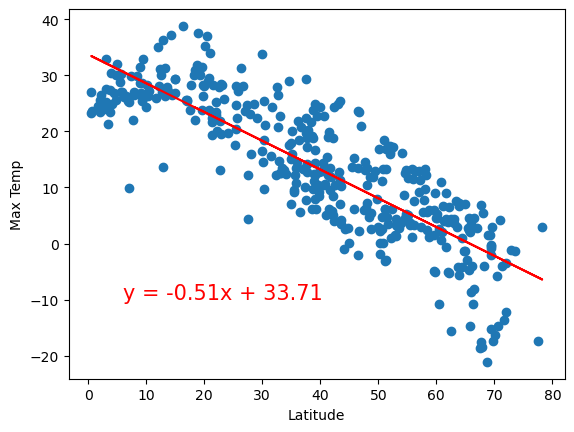

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


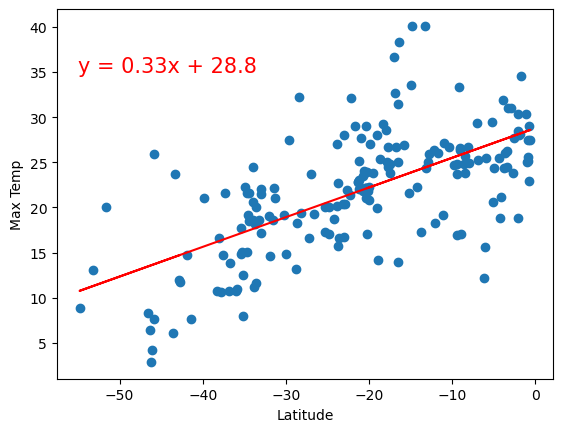

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


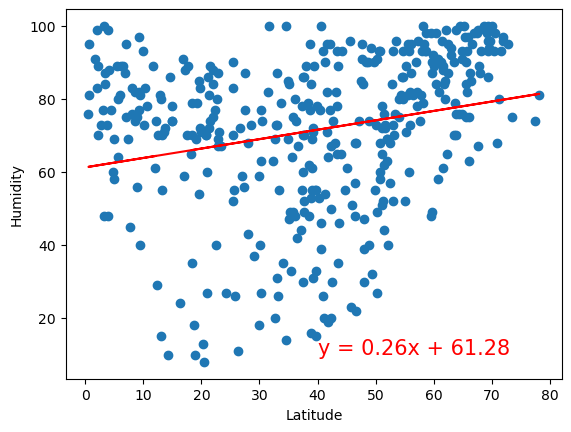

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


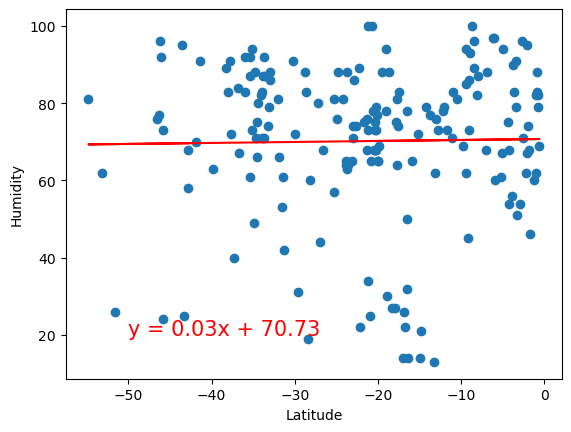

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


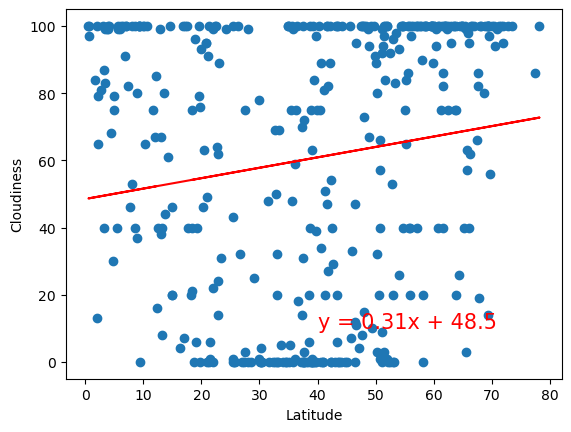

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


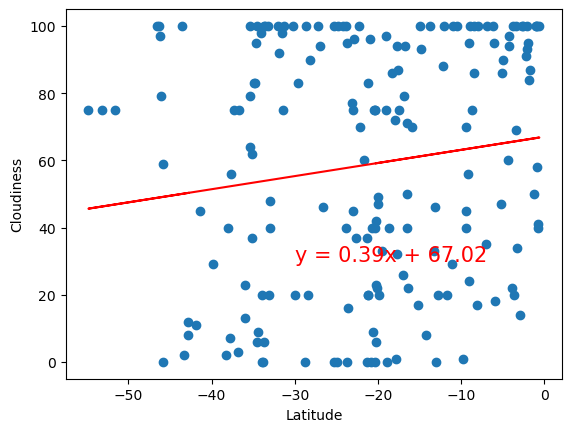

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


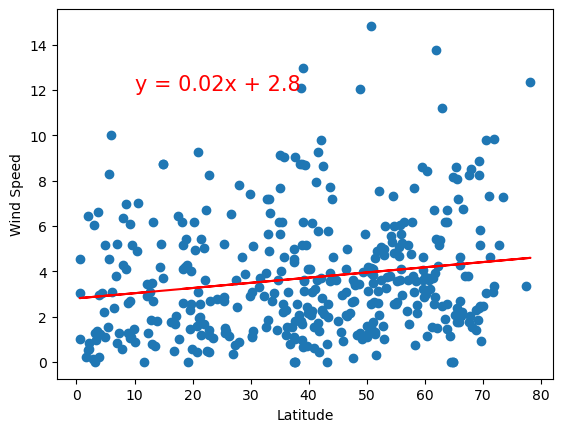

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


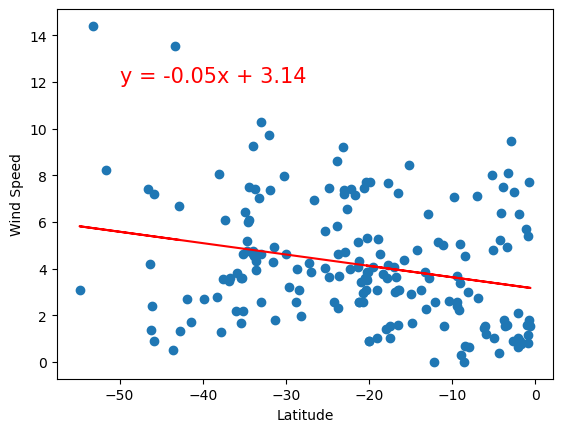

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE